In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s_final = pd.read_csv('standardised_final_dataset.csv')

In [3]:
s_final['DateTime'] = s_final['Unnamed: 0'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
s_final.drop(s_final[['Unnamed: 0']], axis = 1, inplace = True)
s_final = s_final.set_index('DateTime')

In [4]:
# num_train = int(len(s_final) * 0.7)
# num_test = len(s_final) - num_train

# train_data = s_final[:num_train]
# test_data = s_final[num_train:]

# y_train = train_data['0']
# X_train = train_data.drop(train_data[['0', 'PM10']], axis = 1, inplace = False)

# y_test = test_data['0']
# X_test = test_data.drop(test_data[['0', 'PM10']], axis = 1, inplace = False)



In [5]:
from sklearn.model_selection import train_test_split
target = s_final['0']
train = s_final.drop(s_final[['0', 'PM10']], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

#use 10 fold cross validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# 1. KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [8]:
# Create KNN classifierl
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 51)}

#use gridsearch to test all values for n_neighbors
knn_gscv_5 = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv_10 = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)

#fit model to data
knn_gscv_5.fit(X_train, y_train)
knn_gscv_10.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [9]:
#check top performing n_neighbors value
print('cv=5', knn_gscv_5.best_params_)
print('cv=10', knn_gscv_10.best_params_)

cv=5 {'n_neighbors': 14}
cv=10 {'n_neighbors': 16}


In [10]:
# knn_val_score = cross_val_score(knn_gscv_10, X_train, y_train, cv = 10)
# print('Average CV score:', np.mean(knn_val_score))
knn_gscv_10.cv_results_['mean_test_score']

array([0.72832908, 0.72655628, 0.7585409 , 0.76189474, 0.76761817,
       0.77216323, 0.77788705, 0.77828465, 0.77966337, 0.78282348,
       0.78222708, 0.78301915, 0.78578244, 0.78716351, 0.78657218,
       0.78835045, 0.78420454, 0.78479664, 0.78242744, 0.78361087,
       0.7834148 , 0.78380811, 0.78301838, 0.78262351, 0.78321756,
       0.78222864, 0.78104365, 0.78380655, 0.78144125, 0.78045271,
       0.77828114, 0.77966259, 0.77769059, 0.77788549, 0.77551863,
       0.77788588, 0.77690164, 0.77847877, 0.77828231, 0.77749102,
       0.77689813, 0.77926694, 0.77828192, 0.78025431, 0.78065112,
       0.78143891, 0.77946691, 0.78065151, 0.77926889, 0.77887441])

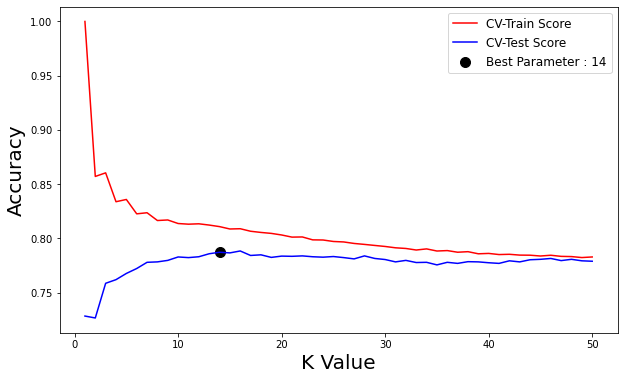

In [11]:
plt.figure(figsize = [10, 6])
plt.plot(np.arange(1, 51), knn_gscv_10.cv_results_['mean_train_score'], label = 'CV-Train Score', c = 'r')
plt.plot(np.arange(1, 51), knn_gscv_10.cv_results_['mean_test_score'], label = 'CV-Test Score', c = 'b')
plt.scatter(14, knn_gscv_10.cv_results_['mean_test_score'][13], label = 'Best Parameter : 14', c = 'k', s = 100)
plt.xlabel('K Value', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.legend(fontsize = 'large')
plt.savefig('KNN_parameter_graph.png')

In [12]:
#check mean score for the top performing value of n_neighbors
print('cv=5', knn_gscv_5.best_score_)
print('cv=10', knn_gscv_10.best_score_)

cv=5 0.7847976307996052
cv=10 0.788350445541081


In [13]:
# Test score
print('cv=5', knn_gscv_5.score(X_test, y_test))
print('cv=10', knn_gscv_10.score(X_test, y_test))

cv=5 0.786273606632888
cv=10 0.7890373099953938


In [14]:
knn_y_pred = knn_gscv_10.predict(X_test)
print(confusion_matrix(y_test, knn_y_pred))

[[ 367  139    1    0]
 [ 108 1240   24    0]
 [   3  150  105    0]
 [   0   15   18    1]]


In [15]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           1       0.77      0.72      0.75       507
           2       0.80      0.90      0.85      1372
           3       0.71      0.41      0.52       258
           4       1.00      0.03      0.06        34

    accuracy                           0.79      2171
   macro avg       0.82      0.52      0.54      2171
weighted avg       0.79      0.79      0.77      2171



# 2. Support Vector Machine

In [16]:
# Parameter 'C' explanation : https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel
# Parameter 'gamma' explanation : https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
from sklearn.svm import SVC

In [17]:
[10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

In [18]:
param_grid = {'C': [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svc_gscv = GridSearchCV(SVC(probability=True), param_grid, cv = 10, n_jobs= 4, return_train_score=True, verbose = 1) 

# fitting the model for grid search 
svc_gscv.fit(X_train, y_train) 

Fitting 10 folds for each of 55 candidates, totalling 550 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 550 out of 550 | elapsed: 59.8min finished


GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=4,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, verbose=1)

In [19]:
svc_best =  svc_gscv.best_estimator_
print('Best Parameters:', svc_gscv.best_params_)
print('Best Score:', svc_gscv.best_score_)
print('Test Score:', svc_gscv.score(X_test, y_test))

Best Parameters: {'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score: 0.8124388988937484
Test Score: 0.8074619990787656


In [20]:
# svm_val_score = cross_val_score(svc_gscv, X_train, y_train, cv = 10)
# print('Average CV score:', np.mean(svm_val_score))
svc_gscv.cv_results_['mean_test_score']

array([0.63060201, 0.63060201, 0.63060201, 0.63060201, 0.63060201,
       0.63060201, 0.63060201, 0.63060201, 0.63060201, 0.63060201,
       0.63060201, 0.63060201, 0.63060201, 0.63060201, 0.63060201,
       0.63060201, 0.63218109, 0.63060201, 0.63060201, 0.63060201,
       0.65034536, 0.78380928, 0.75557492, 0.63060201, 0.63060201,
       0.75775   , 0.80375143, 0.79703674, 0.76070936, 0.63139174,
       0.75182582, 0.7974359 , 0.80552775, 0.79269476, 0.7618924 ,
       0.75143095, 0.77294595, 0.80809575, 0.80118577, 0.79091689,
       0.75143095, 0.73859602, 0.80059483, 0.80572811, 0.79644776,
       0.75143095, 0.72162024, 0.79151484, 0.8124389 , 0.80000039,
       0.75143095, 0.71924948, 0.78065268, 0.80454506, 0.80533285])

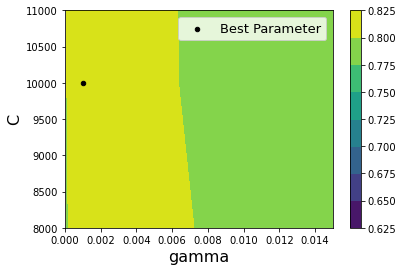

In [21]:
# c_vals = []
# gamma_vals = []
# for i in svc_gscv.cv_results_['params']:
#     c_vals.append(i['C'])
#     gamma_vals.append(i['gamma'])
c_vals = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
gamma_vals = [1, 0.1, 0.01, 0.001, 0.0001]
    
test_score_lst = np.zeros([len(c_vals), len(gamma_vals)])

for c_ind, c in enumerate(c_vals):
    for g_ind, gamma in enumerate(gamma_vals):
        test_score_ind = 5*c_ind + g_ind
        test_score_lst[c_ind, g_ind] = svc_gscv.cv_results_['mean_test_score'][test_score_ind]

# cs = plt.contourf(gamma_vals, c_vals, test_score_lst)
# plt.colorbar(cs)
# plt.scatter(0.001, 10000, c = 'k', s = 20, label = 'Best Test Score')
# plt.legend(fontsize = 13)
# plt.xlabel('gamma', fontsize = 16)
# plt.ylabel('C', fontsize = 16)
# # plt.savefig('svmc_c_gamma.png')
# plt.show()

cs = plt.contourf(gamma_vals, c_vals, test_score_lst)
plt.colorbar(cs)
plt.scatter(0.001, 10000, c = 'k', s = 20, label = 'Best Parameter')
plt.legend(fontsize = 13)
plt.xlabel('gamma', fontsize = 16)
plt.ylabel('C', fontsize = 16)
plt.axis([0,0.015,8000,11000])
# plt.savefig('svmc_c_gamma_zoomed.png')
plt.show()

In [22]:
svc_y_pred = svc_gscv.predict(X_test)
print(confusion_matrix(y_test, svc_y_pred))

[[ 374  133    0    0]
 [  94 1247   31    0]
 [   2  127  128    1]
 [   0   17   13    4]]


In [23]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           1       0.80      0.74      0.77       507
           2       0.82      0.91      0.86      1372
           3       0.74      0.50      0.60       258
           4       0.80      0.12      0.21        34

    accuracy                           0.81      2171
   macro avg       0.79      0.57      0.61      2171
weighted avg       0.80      0.81      0.80      2171



# 3. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
# rf_param_grid = {"max_depth": [13, 16, 19],
#               "max_features": ['auto'],
#               "min_samples_split": [2, 3, 8],
#               "min_samples_leaf": [1, 3, 8],
#               "bootstrap": [True],
#               "n_estimators" :[100,200,300],
#               "criterion": ["gini"]}

rf_param_grid = {"max_depth": [16, 19],
              "max_features": ['auto'],
              "min_samples_split": [2, 3, 8],
              "min_samples_leaf": [1, 3, 8],
              "bootstrap": [True],
              "n_estimators" :[200,300]}


rfc_gscv = GridSearchCV(RFC, rf_param_grid, cv=10, scoring="accuracy",  verbose = 1, n_jobs=4)
#print(score)

rfc_gscv.fit(X_train, y_train)

rfc_best = rfc_gscv.best_estimator_
print(rfc_best)
# Best score
print(rfc_gscv.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  5.4min finished


RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=200)
0.8053297315839121


In [26]:
print('Best Parameters:', rfc_gscv.best_params_)
print('Best Score:', rfc_gscv.best_score_)
print('Test Score:', rfc_gscv.score(X_test, y_test))

Best Parameters: {'bootstrap': True, 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best Score: 0.8053297315839121
Test Score: 0.8070013818516812


In [27]:
rfc_gscv.cv_results_['mean_test_score']

array([0.80256527, 0.80236491, 0.80532973, 0.80276095, 0.80256371,
       0.80216846, 0.79979886, 0.8017732 , 0.80118187, 0.80078428,
       0.80374909, 0.7999961 , 0.79762417, 0.79762534, 0.79624389,
       0.79881189, 0.79545377, 0.80018983, 0.80177554, 0.80296014,
       0.80295858, 0.80414318, 0.80355147, 0.80295858, 0.80177359,
       0.80276251, 0.80118226, 0.80098385, 0.80276056, 0.80118031,
       0.7992052 , 0.80019373, 0.79604587, 0.7992052 , 0.79802177,
       0.80039019])

In [28]:
rfc_y_pred = rfc_gscv.predict(X_test)
print(confusion_matrix(y_test, rfc_y_pred))

[[ 362  145    0    0]
 [  79 1256   37    0]
 [   3  122  133    0]
 [   0   18   15    1]]


In [29]:
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           1       0.82      0.71      0.76       507
           2       0.82      0.92      0.86      1372
           3       0.72      0.52      0.60       258
           4       1.00      0.03      0.06        34

    accuracy                           0.81      2171
   macro avg       0.84      0.54      0.57      2171
weighted avg       0.81      0.81      0.80      2171



# 4. Multiple Layer Perceptron

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
### MLP classifier
mlp = MLPClassifier()
parameters = {'solver': ['lbfgs', 'adam'], 'max_iter': [900, 1000], 'alpha': 10.0 ** -np.arange(6, 10), 'hidden_layer_sizes':np.arange(9, 13), 'random_state':[1]}


mlp_gscv = GridSearchCV(mlp, param_grid = parameters, cv=k_fold, n_jobs= -1)

mlp_gscv.fit(X_train, y_train)

MLP_best = mlp_gscv.best_estimator_
print(MLP_best)

# Best score
print(mlp_gscv.best_score_)

MLPClassifier(alpha=1e-08, hidden_layer_sizes=11, max_iter=1000, random_state=1,
              solver='lbfgs')
0.808684347982007


C:\Users\rnwns\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [32]:
print('Best Parameters:', mlp_gscv.best_params_)
print('Best Score:', mlp_gscv.best_score_)
print('Test Score:', mlp_gscv.score(X_test, y_test))

Best Parameters: {'alpha': 1e-08, 'hidden_layer_sizes': 11, 'max_iter': 1000, 'random_state': 1, 'solver': 'lbfgs'}
Best Score: 0.808684347982007
Test Score: 0.7959465684016582


In [33]:
mlp_gscv.cv_results_['mean_test_score']

array([0.80473217, 0.80493331, 0.80453493, 0.80493331, 0.79723008,
       0.80454117, 0.79742849, 0.80454117, 0.80552502, 0.80394906,
       0.80532739, 0.80394906, 0.80197512, 0.80414552, 0.80039643,
       0.80414552, 0.80631242, 0.80513093, 0.8057207 , 0.80513093,
       0.8007835 , 0.80473841, 0.80098035, 0.80473841, 0.80611752,
       0.8031605 , 0.80651277, 0.8031605 , 0.80059133, 0.80375026,
       0.7994075 , 0.80375026, 0.80611479, 0.80513093, 0.80650927,
       0.80513093, 0.79763041, 0.80473841, 0.79743395, 0.80473841,
       0.80769621, 0.8031605 , 0.80868435, 0.8031605 , 0.80118148,
       0.80375026, 0.79980042, 0.80375026, 0.80670767, 0.80513093,
       0.8057207 , 0.80513093, 0.79881033, 0.80473841, 0.79802216,
       0.80473841, 0.80354952, 0.8031605 , 0.80433886, 0.8031605 ,
       0.80138106, 0.80375026, 0.80118499, 0.80375026])

In [34]:
mlp_y_pred = mlp_gscv.predict(X_test)
print(confusion_matrix(y_test, mlp_y_pred))

[[ 371  135    1    0]
 [ 102 1220   49    1]
 [   2  116  133    7]
 [   0   11   19    4]]


In [35]:
print(classification_report(y_test, mlp_y_pred))

              precision    recall  f1-score   support

           1       0.78      0.73      0.76       507
           2       0.82      0.89      0.85      1372
           3       0.66      0.52      0.58       258
           4       0.33      0.12      0.17        34

    accuracy                           0.80      2171
   macro avg       0.65      0.56      0.59      2171
weighted avg       0.79      0.80      0.79      2171



# 5. Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gbc_gscv = GridSearchCV(GBC,param_grid = gb_param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

gbc_gscv.fit(X_train, y_train)

GBC_best = gbc_gscv.best_estimator_
print(GBC_best)
# Best score
print(gbc_gscv.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed: 20.5min finished


GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features=0.3,
                           min_samples_leaf=150, n_estimators=300)
0.8080945810042801


In [38]:
print('Best Parameters:', gbc_gscv.best_params_)
print('Best Score:', gbc_gscv.best_score_)
print('Test Score:', gbc_gscv.score(X_test, y_test))

Best Parameters: {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 300}
Best Score: 0.8080945810042801
Test Score: 0.8023952095808383


In [39]:
gbc_gscv.cv_results_['mean_test_score']

array([0.8053309 , 0.80611713, 0.80493486, 0.80315543, 0.80591911,
       0.80276134, 0.80078467, 0.80177827, 0.80374753, 0.79703401,
       0.8031566 , 0.80414201, 0.80434588, 0.80098658, 0.7994075 ,
       0.8027629 , 0.80454   , 0.79900952, 0.80414318, 0.80710371,
       0.80631748, 0.80098463, 0.80453493, 0.80256449, 0.80216963,
       0.80473841, 0.80355147, 0.80216768, 0.80315582, 0.80493136,
       0.79407193, 0.7986166 , 0.80473919, 0.79367316, 0.79782531,
       0.80177203, 0.80493408, 0.80750209, 0.80513639, 0.80592106,
       0.80750248, 0.80809458, 0.8027629 , 0.80236608, 0.8053309 ,
       0.79663681, 0.80137716, 0.80236608, 0.76939176, 0.79091182,
       0.7984139 , 0.76780995, 0.78834421, 0.7946613 , 0.72654731,
       0.77038029, 0.78578128, 0.72062313, 0.76761427, 0.78558014,
       0.77886701, 0.79584746, 0.80355147, 0.77393292, 0.79387274,
       0.80196927, 0.74984369, 0.78617575, 0.79643879, 0.73918462,
       0.77985476, 0.79288304])

In [40]:
gbc_y_pred = gbc_gscv.predict(X_test)
print(confusion_matrix(y_test, gbc_y_pred))

[[ 375  131    1    0]
 [ 104 1221   46    1]
 [   2  110  145    1]
 [   0   16   17    1]]


In [41]:
print(classification_report(y_test, gbc_y_pred))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76       507
           2       0.83      0.89      0.86      1372
           3       0.69      0.56      0.62       258
           4       0.33      0.03      0.05        34

    accuracy                           0.80      2171
   macro avg       0.66      0.56      0.57      2171
weighted avg       0.79      0.80      0.79      2171



In [42]:
print('GBC', gbc_gscv.best_score_)
print('MLP', mlp_gscv.best_score_)
print('RFC', rfc_gscv.best_score_)
print("SVC", svc_gscv.best_score_)
print('KNN', knn_gscv_10.best_score_)

GBC 0.8080945810042801
MLP 0.808684347982007
RFC 0.8053297315839121
SVC 0.8124388988937484
KNN 0.788350445541081


In [43]:
from sklearn.ensemble import VotingClassifier
import itertools

In [44]:
arr = [('rfc', rfc_best), ('svc', svc_best),('gbc',GBC_best),  ('mlp', MLP_best), ('knn', knn_gscv_10.best_estimator_)]

results_2 = []
for i in range(len(list(itertools.combinations(arr,2)))):
    print('Combination 2',i+1, end="\r")
    estimator_2 = [list(itertools.combinations(arr,2))[i][0],list(itertools.combinations(arr,2))[i][1]]
    combination_2 = [list(itertools.combinations(arr,2))[i][0][0], list(itertools.combinations(arr,2))[i][1][0]]
    hard_votingC = VotingClassifier(estimators = estimator_2, voting='hard', n_jobs=4)
    hard_votingC = hard_votingC.fit(X_train, y_train)
    hard_predict = hard_votingC.predict(X_test)
    train_score =  hard_votingC.score(X_train, y_train)
    test_score = hard_votingC.score(X_test, y_test)
    
    results_2.append([combination_2, train_score, test_score])
    
results_3 = []
for i in range(len(list(itertools.combinations(arr,3)))):
    print('Combination 3',i+1, end="\r")
    estimator_3 = [list(itertools.combinations(arr,3))[i][0],list(itertools.combinations(arr,3))[i][1], list(itertools.combinations(arr,3))[i][2]]
    combination_3 = [list(itertools.combinations(arr,3))[i][0][0], list(itertools.combinations(arr,3))[i][1][0], list(itertools.combinations(arr,3))[i][2][0]]
    hard_votingC = VotingClassifier(estimators = estimator_3, voting='hard', n_jobs=4)
    hard_votingC = hard_votingC.fit(X_train, y_train)
    hard_predict = hard_votingC.predict(X_test)
    train_score =  hard_votingC.score(X_train, y_train)
    test_score = hard_votingC.score(X_test, y_test)
    
    results_3.append([combination_3, train_score, test_score])

results_4 = []
for i in range(len(list(itertools.combinations(arr,4)))):
    print('Combination 4',i+1, end="\r")
    estimator_4 = [list(itertools.combinations(arr,4))[i][0],list(itertools.combinations(arr,4))[i][1], list(itertools.combinations(arr,4))[i][2], list(itertools.combinations(arr,4))[i][3]]
    combination_4 = [list(itertools.combinations(arr,4))[i][0][0], list(itertools.combinations(arr,4))[i][1][0], list(itertools.combinations(arr,4))[i][2][0], list(itertools.combinations(arr,4))[i][3][0]]
    hard_votingC = VotingClassifier(estimators = estimator_4, voting='hard', n_jobs=4)
    hard_votingC = hard_votingC.fit(X_train, y_train)
    hard_predict = hard_votingC.predict(X_test)
    train_score =  hard_votingC.score(X_train, y_train)
    test_score = hard_votingC.score(X_test, y_test)
    
    results_4.append([combination_4, train_score, test_score])
    
results_5 = []
for i in range(len(list(itertools.combinations(arr,5)))):
    print('Combination 5',i+1, end="\r")
    estimator_5 = [list(itertools.combinations(arr,5))[i][0],list(itertools.combinations(arr,5))[i][1], list(itertools.combinations(arr,5))[i][2], list(itertools.combinations(arr,5))[i][3], list(itertools.combinations(arr,5))[i][4]]
    combination_5 = [list(itertools.combinations(arr,5))[i][0][0], list(itertools.combinations(arr,5))[i][1][0], list(itertools.combinations(arr,5))[i][2][0], list(itertools.combinations(arr,5))[i][3][0], list(itertools.combinations(arr,5))[i][4][0]]
    hard_votingC = VotingClassifier(estimators = estimator_5, voting='hard', n_jobs=4)
    hard_votingC = hard_votingC.fit(X_train, y_train)
    hard_predict = hard_votingC.predict(X_test)
    train_score =  hard_votingC.score(X_train, y_train)
    test_score = hard_votingC.score(X_test, y_test)
    
    results_5.append([combination_5, train_score, test_score])

In [45]:
print('Hard Voting Results')
print('Combination, train score, test score')
for i in results_2:
    print(i)
print()  
for i in results_3:
    print(i)
print()   
for i in results_4:
    print(i)
print()   
for i in results_5:
    print(i)

Hard Voting Results
Combination, train score, test score
[['rfc', 'svc'], 0.8923988153998026, 0.8079226163058498]
[['rfc', 'gbc'], 0.9563672260612044, 0.8051589129433441]
[['rfc', 'mlp'], 0.8957551826258637, 0.8093044679871028]
[['rfc', 'knn'], 0.8742349457058243, 0.7977890373099954]
[['svc', 'gbc'], 0.863376110562685, 0.8033164440350069]
[['svc', 'mlp'], 0.8258637709772951, 0.8033164440350069]
[['svc', 'knn'], 0.8126357354392892, 0.7941040994933211]
[['gbc', 'mlp'], 0.869299111549852, 0.8028558268079227]
[['gbc', 'knn'], 0.8499506416584403, 0.7918010133578995]
[['mlp', 'knn'], 0.8153998025666338, 0.7936434822662367]

[['rfc', 'svc', 'gbc'], 0.9354392892398815, 0.8226623675725472]
[['rfc', 'svc', 'mlp'], 0.8556762092793682, 0.8129894058037771]
[['rfc', 'svc', 'knn'], 0.8627838104639685, 0.8088438507600184]
[['rfc', 'gbc', 'mlp'], 0.9360315893385982, 0.8125287885766928]
[['rfc', 'gbc', 'knn'], 0.9389930898321817, 0.8106863196683556]
[['rfc', 'mlp', 'knn'], 0.8732477788746298, 0.80884385

In [46]:
s_results_2 = []
for i in range(len(list(itertools.combinations(arr,2)))):
    print('Combination 2',i+1, end="\r")
    estimator_2 = [list(itertools.combinations(arr,2))[i][0],list(itertools.combinations(arr,2))[i][1]]
    combination_2 = [list(itertools.combinations(arr,2))[i][0][0], list(itertools.combinations(arr,2))[i][1][0]]
    soft_votingC = VotingClassifier(estimators = estimator_2, voting='soft', n_jobs=4)
    soft_votingC = soft_votingC.fit(X_train, y_train)
    soft_predict = soft_votingC.predict(X_test)
    train_score =  soft_votingC.score(X_train, y_train)
    test_score = soft_votingC.score(X_test, y_test)
    
    s_results_2.append([combination_2, train_score, test_score])
    
s_results_3 = []
for i in range(len(list(itertools.combinations(arr,3)))):
    print('Combination 3',i+1, end="\r")
    estimator_3 = [list(itertools.combinations(arr,3))[i][0],list(itertools.combinations(arr,3))[i][1], list(itertools.combinations(arr,3))[i][2]]
    combination_3 = [list(itertools.combinations(arr,3))[i][0][0], list(itertools.combinations(arr,3))[i][1][0], list(itertools.combinations(arr,3))[i][2][0]]
    soft_votingC = VotingClassifier(estimators = estimator_3, voting='soft', n_jobs=4)
    soft_votingC = soft_votingC.fit(X_train, y_train)
    soft_predict = soft_votingC.predict(X_test)
    train_score =  soft_votingC.score(X_train, y_train)
    test_score = soft_votingC.score(X_test, y_test)
    
    s_results_3.append([combination_3, train_score, test_score])

s_results_4 = []
for i in range(len(list(itertools.combinations(arr,4)))):
    print('Combination 4',i+1, end="\r")
    estimator_4 = [list(itertools.combinations(arr,4))[i][0],list(itertools.combinations(arr,4))[i][1], list(itertools.combinations(arr,4))[i][2], list(itertools.combinations(arr,4))[i][3]]
    combination_4 = [list(itertools.combinations(arr,4))[i][0][0], list(itertools.combinations(arr,4))[i][1][0], list(itertools.combinations(arr,4))[i][2][0], list(itertools.combinations(arr,4))[i][3][0]]
    soft_votingC = VotingClassifier(estimators = estimator_4, voting='soft', n_jobs=4)
    soft_votingC = soft_votingC.fit(X_train, y_train)
    soft_predict = soft_votingC.predict(X_test)
    train_score =  soft_votingC.score(X_train, y_train)
    test_score = soft_votingC.score(X_test, y_test)
    
    s_results_4.append([combination_4, train_score, test_score])
    
s_results_5 = []
for i in range(len(list(itertools.combinations(arr,5)))):
    print('Combination 5',i+1, end="\r")
    estimator_5 = [list(itertools.combinations(arr,5))[i][0],list(itertools.combinations(arr,5))[i][1], list(itertools.combinations(arr,5))[i][2], list(itertools.combinations(arr,5))[i][3], list(itertools.combinations(arr,5))[i][4]]
    combination_5 = [list(itertools.combinations(arr,5))[i][0][0], list(itertools.combinations(arr,5))[i][1][0], list(itertools.combinations(arr,5))[i][2][0], list(itertools.combinations(arr,5))[i][3][0], list(itertools.combinations(arr,5))[i][4][0]]
    soft_votingC = VotingClassifier(estimators = estimator_5, voting='soft', n_jobs=4)
    soft_votingC = soft_votingC.fit(X_train, y_train)
    soft_predict = soft_votingC.predict(X_test)
    train_score =  soft_votingC.score(X_train, y_train)
    test_score = soft_votingC.score(X_test, y_test)
    
    s_results_5.append([combination_5, train_score, test_score])

In [47]:
print('Soft Voting Results')
print('Combination, train score, test score')
for i in s_results_2:
    print(i)
print()  
for i in s_results_3:
    print(i)
print()   
for i in s_results_4:
    print(i)
print()   
for i in s_results_5:
    print(i)

Soft Voting Results
Combination, train score, test score
[['rfc', 'svc'], 0.904639684106614, 0.8148318747121143]
[['rfc', 'gbc'], 0.968213228035538, 0.8079226163058498]
[['rfc', 'mlp'], 0.9133267522211254, 0.8102257024412713]
[['rfc', 'knn'], 0.9216189536031589, 0.8042376784891755]
[['svc', 'gbc'], 0.8720631786771964, 0.809765085214187]
[['svc', 'mlp'], 0.828035538005923, 0.806540764624597]
[['svc', 'knn'], 0.8240868706811452, 0.8070013818516812]
[['gbc', 'mlp'], 0.8817374136229023, 0.8116075541225242]
[['gbc', 'knn'], 0.8876604146100691, 0.8079226163058498]
[['mlp', 'knn'], 0.8292201382033564, 0.8079226163058498]

[['rfc', 'svc', 'gbc'], 0.9220138203356367, 0.8157531091662829]
[['rfc', 'svc', 'mlp'], 0.8791707798617966, 0.8134500230308613]
[['rfc', 'svc', 'knn'], 0.8819348469891412, 0.8093044679871028]
[['rfc', 'gbc', 'mlp'], 0.9239881539980257, 0.8148318747121143]
[['rfc', 'gbc', 'knn'], 0.9291214215202369, 0.8116075541225242]
[['rfc', 'mlp', 'knn'], 0.8856860809476802, 0.81206817134

# Voting: Hard Voting

In [48]:
hard_votingC_final = VotingClassifier(estimators=[ ('rfc', rfc_best),
('svc', svc_best),('gbc',GBC_best),  ('mlp', MLP_best), ('knn', knn_gscv_10.best_estimator_)], voting='hard', n_jobs=4)

hard_votingC_final = hard_votingC_final.fit(X_train, y_train)
hard_predict_final = hard_votingC_final.predict(X_test)
print('Hard voting', hard_votingC_final.score(X_train, y_train))
print('Hard voting test score', hard_votingC_final.score(X_test, y_test))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, hard_predict_final))
print()
print('Classification report')
print(classification_report(y_test, hard_predict_final))

Hard voting 0.8720631786771964
Hard voting test score 0.8148318747121143

Confusion Matrix
[[ 375  131    1    0]
 [  84 1258   30    0]
 [   2  123  133    0]
 [   0   16   15    3]]

Classification report
              precision    recall  f1-score   support

           1       0.81      0.74      0.77       507
           2       0.82      0.92      0.87      1372
           3       0.74      0.52      0.61       258
           4       1.00      0.09      0.16        34

    accuracy                           0.81      2171
   macro avg       0.84      0.57      0.60      2171
weighted avg       0.81      0.81      0.80      2171



# Voting: Soft Voting

In [49]:
soft_votingC_final = VotingClassifier(estimators=[('rfc', rfc_best), 
('gbc',GBC_best), ('mlp', MLP_best)], voting='soft', n_jobs=4)

soft_votingC_final = soft_votingC_final.fit(X_train, y_train)
soft_predict_final = soft_votingC_final.predict(X_test)
soft_votingC_final.score(X_test, y_test)
print('Soft voting', soft_votingC_final.score(X_train, y_train))
print('Soft voting test score', soft_votingC_final.score(X_test, y_test))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, soft_predict_final))
print()
print('Classification report')
print(classification_report(y_test, soft_predict_final))

Soft voting 0.9255676209279369
Soft voting test score 0.8079226163058498

Confusion Matrix
[[ 374  132    1    0]
 [  94 1239   39    0]
 [   2  114  139    3]
 [   0   14   18    2]]

Classification report
              precision    recall  f1-score   support

           1       0.80      0.74      0.77       507
           2       0.83      0.90      0.86      1372
           3       0.71      0.54      0.61       258
           4       0.40      0.06      0.10        34

    accuracy                           0.81      2171
   macro avg       0.68      0.56      0.59      2171
weighted avg       0.80      0.81      0.80      2171



# Summary

In [50]:
print('Training Best Score')
print()
print('GBC', gbc_gscv.best_score_)
print('MLP', mlp_gscv.best_score_)
print('RFC', rfc_gscv.best_score_)
print("SVC", svc_gscv.best_score_)
print('KNN', knn_gscv_10.best_score_)
print()
print('Hard voting', hard_votingC_final.score(X_train, y_train))
print('Soft voting', soft_votingC_final.score(X_train, y_train))

print('----------------------------------------------------------------')
print()
print('Test Score')
print('GBC', gbc_gscv.score(X_test, y_test))
print('MLP', mlp_gscv.score(X_test, y_test))
print('RFC', rfc_gscv.score(X_test, y_test))
print("SVC", svc_gscv.score(X_test, y_test))
print('KNN', knn_gscv_10.score(X_test, y_test))
print()
print('Hard voting', hard_votingC_final.score(X_test, y_test))
print('Soft voting', soft_votingC_final.score(X_test, y_test))


Training Best Score

GBC 0.8080945810042801
MLP 0.808684347982007
RFC 0.8053297315839121
SVC 0.8124388988937484
KNN 0.788350445541081

Hard voting 0.8720631786771964
Soft voting 0.9255676209279369
----------------------------------------------------------------

Test Score
GBC 0.8023952095808383
MLP 0.7959465684016582
RFC 0.8070013818516812
SVC 0.8074619990787656
KNN 0.7890373099953938

Hard voting 0.8148318747121143
Soft voting 0.8079226163058498


# Confusion map Analysis

In [51]:
# knn_gscv_10
# svc_gscv
# rfc_gscv
# mlp_gscv
# gbc_gscv
# hard_votingC
# soft_votingC

In [52]:
import sklearn.metrics as sm
import itertools

In [53]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [54]:
knn_con = confusion_matrix(y_test, knn_y_pred)
svc_con = confusion_matrix(y_test, svc_y_pred)
rfc_con = confusion_matrix(y_test, rfc_y_pred)
mlp_con = confusion_matrix(y_test, mlp_y_pred)
gbc_con = confusion_matrix(y_test, gbc_y_pred)
h_voting_con = confusion_matrix(y_test, hard_predict_final)
s_voting_con = confusion_matrix(y_test, soft_predict_final)

target_name = ['Good', 'Moderate', 'Bad', 'Very Bad']

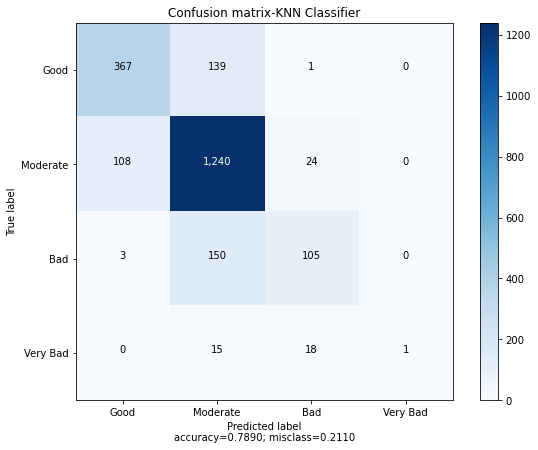

In [55]:
# KNN plot
norm = False
knn_plot = plot_confusion_matrix(knn_con, target_names=target_name, cmap=None, normalize=norm, labels=True, title='Confusion matrix-KNN Classifier')
knn_plot

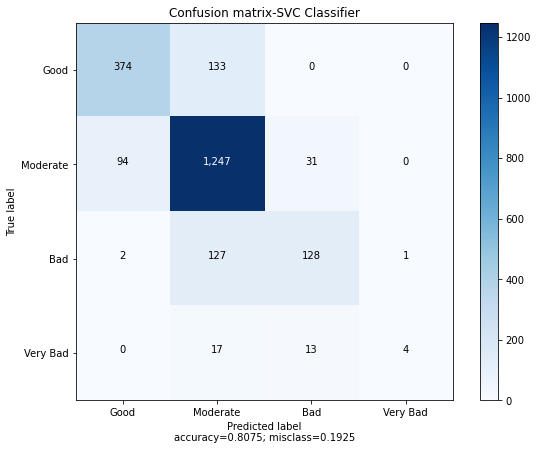

In [56]:
svc_plot = plot_confusion_matrix(svc_con, target_names=target_name, cmap=None, normalize=norm, labels=True, title='Confusion matrix-SVC Classifier')
svc_plot

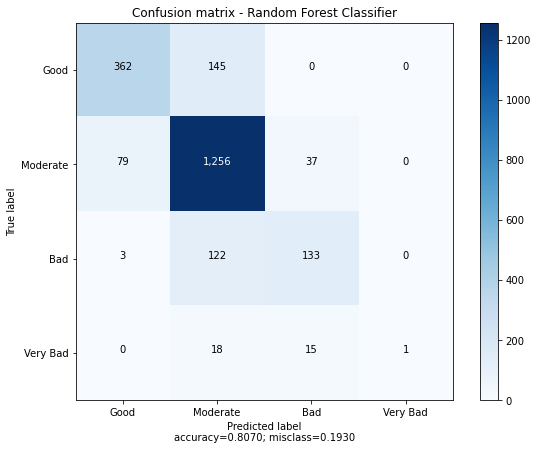

In [57]:
rfc_plot = plot_confusion_matrix(rfc_con, target_names=target_name, cmap=None, normalize=norm, labels=True, title='Confusion matrix - Random Forest Classifier')
rfc_plot

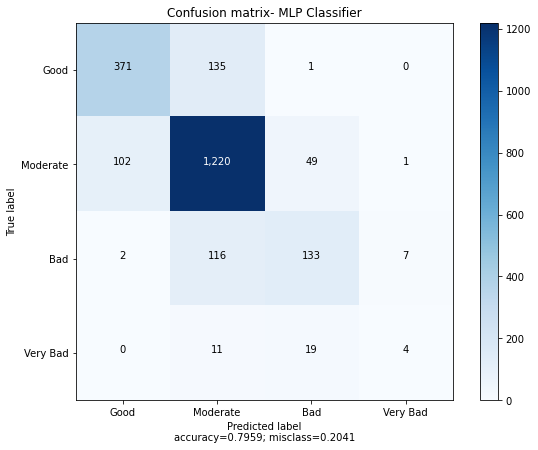

In [58]:
mlp_plot = plot_confusion_matrix(mlp_con, target_names=target_name, cmap=None, normalize=norm, labels=True, title='Confusion matrix- MLP Classifier')
mlp_plot

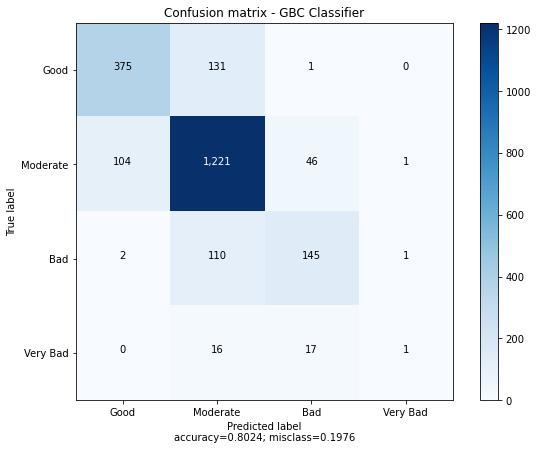

In [59]:
gbc_plot = plot_confusion_matrix(gbc_con, target_names=target_name, cmap=None, normalize=norm, labels=True, title='Confusion matrix - GBC Classifier')
gbc_plot

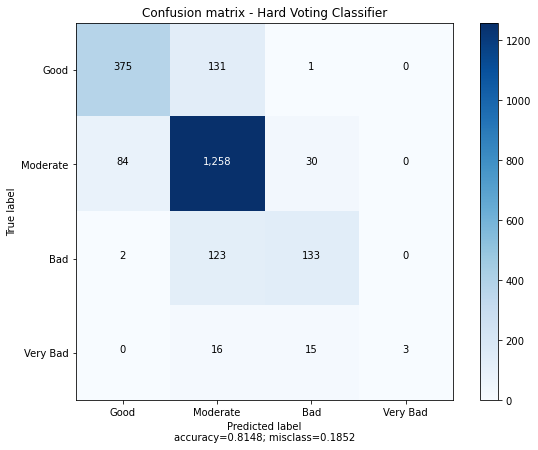

In [60]:
h_voting_plot = plot_confusion_matrix(h_voting_con, target_names=target_name, cmap=None, normalize=norm, labels=True, title='Confusion matrix - Hard Voting Classifier')
h_voting_plot

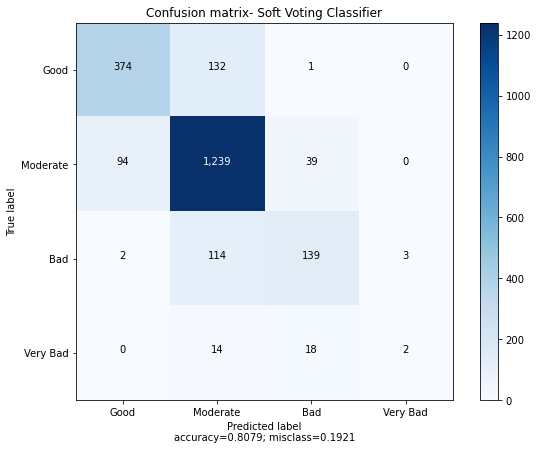

In [61]:
s_voting_plot = plot_confusion_matrix(s_voting_con, target_names=target_name, cmap=None, normalize=norm, labels=True, title='Confusion matrix- Soft Voting Classifier')
s_voting_plot

# Binary Variable

In [62]:
def binary_predictions(prediction):
    b_list = []
    for i in prediction:
        if i == 1:
            b_list.append(1)
        if i == 2:
            b_list.append(1)
        if i == 3:
            b_list.append(0)
        if i == 4:
            b_list.append(0)
            
    return b_list

In [63]:
b_true_test = binary_predictions(y_test)

In [64]:
b_soft_pred = binary_predictions(soft_predict_final)
b_hard_pred = binary_predictions(hard_predict_final)
b_knn_pred = binary_predictions(knn_y_pred)
b_svc_pred = binary_predictions(svc_y_pred)
b_rfc_pred = binary_predictions(rfc_y_pred)
b_mlp_pred = binary_predictions(mlp_y_pred)
b_gbc_pred = binary_predictions(gbc_y_pred)

b_knn_con = confusion_matrix(b_true_test, b_knn_pred)
b_svc_con = confusion_matrix(b_true_test, b_svc_pred)
b_rfc_con = confusion_matrix(b_true_test, b_rfc_pred)
b_mlp_con = confusion_matrix(b_true_test, b_mlp_pred)
b_gbc_con = confusion_matrix(b_true_test, b_gbc_pred)
b_h_voting_con = confusion_matrix(b_true_test, b_hard_pred)
b_s_voting_con = confusion_matrix(b_true_test, b_soft_pred)

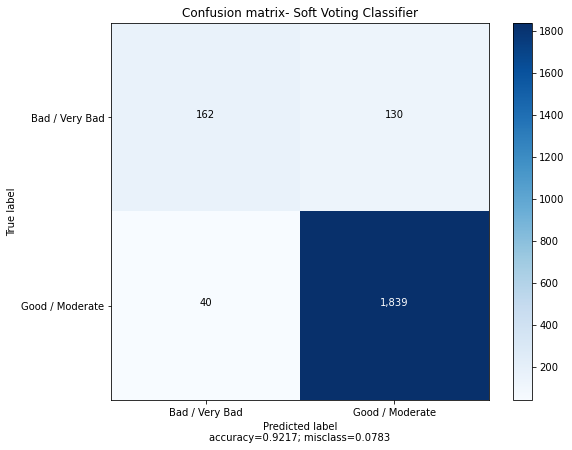

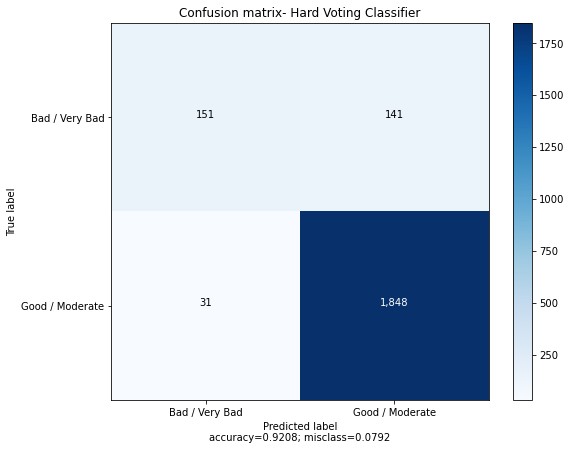

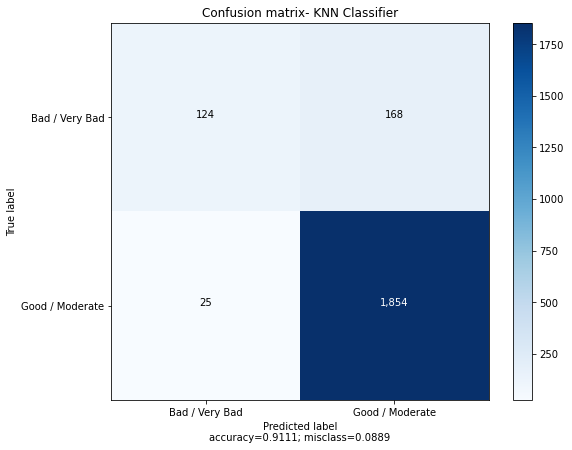

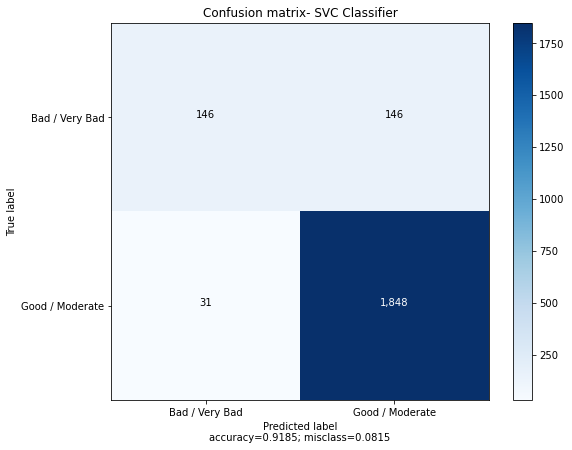

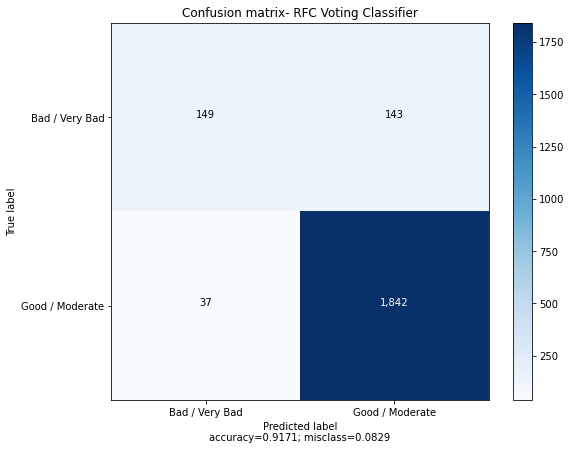

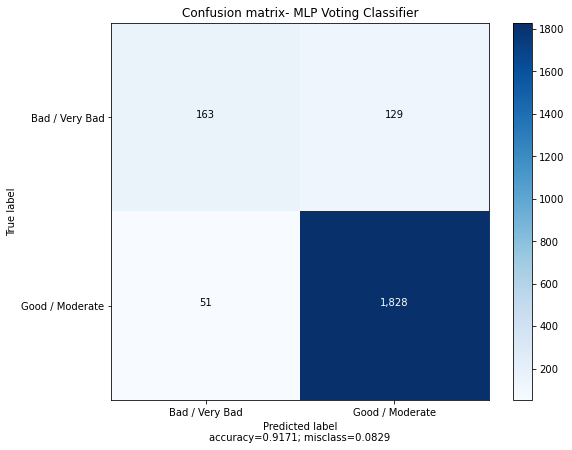

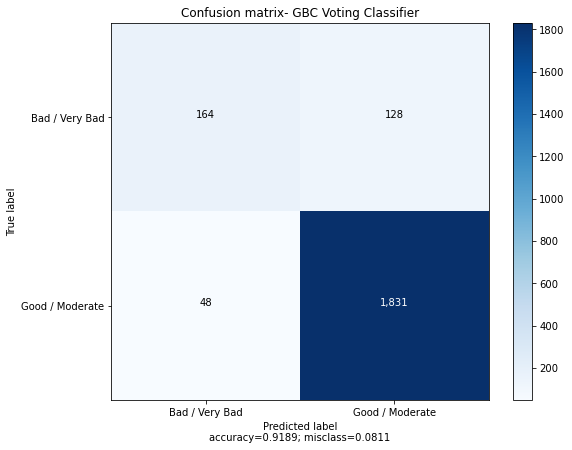

In [65]:
binary_target_name = ['Bad / Very Bad', 'Good / Moderate']

on = False

b_s_voting_plot = plot_confusion_matrix(b_s_voting_con, target_names=binary_target_name, cmap=None, normalize=on, labels=True, title='Confusion matrix- Soft Voting Classifier')
b_h_voting_plot = plot_confusion_matrix(b_h_voting_con, target_names=binary_target_name, cmap=None, normalize=on, labels=True, title='Confusion matrix- Hard Voting Classifier')
b_knn_voting_plot = plot_confusion_matrix(b_knn_con, target_names=binary_target_name, cmap=None, normalize=on, labels=True, title='Confusion matrix- KNN Classifier')
b_svc_voting_plot = plot_confusion_matrix(b_svc_con, target_names=binary_target_name, cmap=None, normalize=on, labels=True, title='Confusion matrix- SVC Classifier')
b_rfc_voting_plot = plot_confusion_matrix(b_rfc_con, target_names=binary_target_name, cmap=None, normalize=on, labels=True, title='Confusion matrix- RFC Voting Classifier')
b_mlp_voting_plot = plot_confusion_matrix(b_mlp_con, target_names=binary_target_name, cmap=None, normalize=on, labels=True, title='Confusion matrix- MLP Voting Classifier')
b_gbc_voting_plot = plot_confusion_matrix(b_gbc_con, target_names=binary_target_name, cmap=None, normalize=on, labels=True, title='Confusion matrix- GBC Voting Classifier')

In [66]:
original_PM = pd.read_csv('final_dataset.csv')
original_PM['DateTime'] = original_PM['DateTime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
original_PM = original_PM.set_index('DateTime')
original_PM = original_PM['PM10']

In [67]:
X_test

,avg_precipitation,avg_humidity,avg_dew_point,avg_cloud,avg_wind,avg_pressure,avg_temp,SO2,O3,NO2,CO,PM10y
DateTime,,,,,,,,,,,,
2003-05-23,-0.250302,-0.550831,0.467049,-0.166591,-1.105877,-0.194467,0.759767,2.132212,0.123369,3.469269,1.719384,4.518786
2017-06-21,-0.250302,-0.530715,0.801375,-0.578645,0.644975,-1.322751,1.186467,-0.137799,1.759975,-0.717633,-0.818414,0.002784
2005-02-17,-0.250302,0.019131,-0.586080,-0.800521,0.061357,0.933818,-0.776352,-0.290229,-0.558349,0.096131,-0.245702,-1.081092
2006-10-20,-0.217519,0.810374,0.776301,-0.261680,-0.872430,0.767139,0.589087,-0.118060,-0.556732,0.623584,0.426841,0.405158
2018-09-11,-0.250302,-0.832460,0.433616,0.847697,-0.989154,0.626104,0.826143,-1.045803,0.738005,-1.492274,-1.149431,-1.085551
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-12,-0.250302,0.790257,1.202567,1.481627,-0.055366,-2.027929,1.120091,-0.374669,1.494481,-0.391132,-0.014515,-0.800893
2000-11-15,-0.250302,-0.483777,-0.310260,1.037876,-0.872430,1.421031,-0.226383,1.579514,-0.836774,0.934081,2.286841,0.911335
2009-06-17,-0.250302,0.642738,0.884957,1.323145,-0.872430,-0.361145,0.778732,-0.236495,-0.960428,1.347009,0.379553,-0.094599


In [68]:
test_pm = pd.merge(X_test, original_PM, left_index=True, right_index=True)
PM_to_threshold = test_pm['PM10']

In [69]:
def ROC(threshold, model_pred):
    threshold_result = []
    for i in PM_to_threshold:
        if i <= threshold:
            threshold_result.append(0)
        else:
            threshold_result.append(1)

    con = confusion_matrix(threshold_result, model_pred)

    TP = con[0][0]
    FP = con[1][0]
    FN = con[0][1]
    TN = con[1][1]

    x = FP / (TN + FP)
    y = TP / (TP + FN)

    return x, y

In [70]:
ROC(80, b_soft_pred)

(0.5547945205479452, 0.021287919105907396)

In [71]:
threshold_lst = np.linspace(0, 900, 900)

In [72]:
def ROC_plot(model_pred):
    one_spec = []
    sens = []
    for thres in threshold_lst:
        one_spec.append(ROC(thres, model_pred)[0])
        sens.append(ROC(thres, model_pred)[1])

    plt.plot(one_spec, sens)
    plt.show()

<ipython-input-69-a762c0e1bb48>:17: RuntimeWarning: invalid value encountered in longlong_scalars
  y = TP / (TP + FN)
<ipython-input-69-a762c0e1bb48>:16: RuntimeWarning: invalid value encountered in longlong_scalars
  x = FP / (TN + FP)


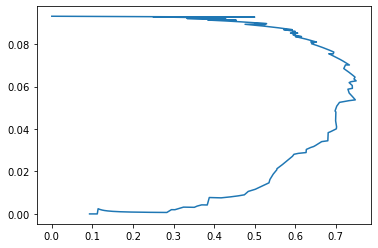

In [73]:
ROC_plot(b_soft_pred)

In [74]:
plot_confusion_matrix(confusion_matrix(threshold_result, b_soft_pred))

NameError: name 'threshold_result' is not defined

In [ ]:
b_gbc_voting_plot = plot_confusion_matrix(confusion_matrix(threshold_result, b_knn_pred), target_names=binary_target_name, cmap=None, normalize=False, labels=True, title='Confusion matrix- GBC Voting Classifier')

## Max Accuracy

In [ ]:
threshold_lst = np.linspace(50, 400, 400)

In [ ]:
def evaluate(model_pred, threshold):
    threshold_result = []
    for i in PM_to_threshold:
        if i <= threshold:
            threshold_result.append(1)
        else:
            threshold_result.append(0)
    TP = confusion_matrix(threshold_result, model_pred)[0][0]
    TN =  confusion_matrix(threshold_result, model_pred)[1][1]
    FN = confusion_matrix(threshold_result, model_pred)[0][1]
    FP = confusion_matrix(threshold_result, model_pred)[1][0]
    accuracy = (TP + TN)/len(model_pred)
    sensitivity = TP / (TP + FN)
    specificity = TN / (FP + TN)
    return accuracy, sensitivity, specificity

In [ ]:
def eval_results(model):
    accuracy_lst = []
    sens_lst = []
    spec_lst = []
    for i in threshold_lst:
        accuracy_lst.append(100 * evaluate(model, i)[0])
        sens_lst.append(100* evaluate(model, i)[1])
        spec_lst.append(100 * evaluate(model, i)[2])
    return accuracy_lst, sens_lst, spec_lst

In [ ]:
def plot_eval(model):
    result = eval_results(model)
    plt.figure(figsize=(10,6))
    s = 25
    plt.title(model_name, fontsize = s)
    plt.plot(threshold_lst, result[0], label = 'Accuracy')
    plt.xlabel('Threshold', fontsize=s)
    # plt.ylabel('Acuuracy (%)')
    
    
    plt.plot(threshold_lst, result[1], label = 'Sensitivity')
    # plt.xlabel('Threshold')
    # plt.ylabel('Sensitivity (%)')
    
    best_acc_index = result[0].index(np.max(result[0]))
    plt.plot(threshold_lst, result[2], label = 'Specificity')
    plt.axvline(x = threshold_lst[best_acc_index], label='Best Threshold', color = 'k')
    # plt.xlabel('Threshold')
    # plt.ylabel('Specificity (%)')
    plt.legend(loc = 'lower right', fontsize = 3/4 * s)
    plt.ylabel('Percent (%)', fontsize=s)
    plt.show()
    
    
    print()
    print('Best Accuracy', np.max(result[0]))
    print('Corresponding threshold', threshold_lst[best_acc_index])
    print('Corresponding sens', result[1][best_acc_index])
    print('Corresponding spec', result[2][best_acc_index])
    print()

In [ ]:
model_lst = [b_soft_pred, b_hard_pred, b_knn_pred, b_svc_pred, b_rfc_pred, b_mlp_pred, b_gbc_pred]
model_name_lst = ['Soft Voting Classifier', 'Hard Voting Classifier', 'KNN', 'SVMC', 'RFC', 'MLP', 'GBC']
for i, j in enumerate(model_lst):
    model_name =model_name_lst[i]
    plot_eval(j)

## Matthew's correlation coefficient

In [ ]:
def MCC_evaluate(model_pred, threshold):
    threshold_result = []
    for i in PM_to_threshold:
        if i <= threshold:
            threshold_result.append(1)
        else:
            threshold_result.append(0)
    TP = confusion_matrix(threshold_result, model_pred)[0][0]
    TN =  confusion_matrix(threshold_result, model_pred)[1][1]
    FN = confusion_matrix(threshold_result, model_pred)[0][1]
    FP = confusion_matrix(threshold_result, model_pred)[1][0]
    
    S = (TP + FN)/len(model_pred)
    P = (TP + FP) / len(model_pred)
    MMC_up = (TP/len(model_pred) - S * P)
    MMC_down = np.sqrt(P * S * (1-S) * (1-P))
    MMC = MMC_up / MMC_down
    
    accuracy = (TP + TN)/len(model_pred)
    sensitivity = TP / (TP + FN)
    specificity = TN / (FP + TN)
    return accuracy, sensitivity, specificity, abs(MMC)

In [ ]:
def MMC_eval_results(model):
    MMC_lst = []
    accuracy_lst = []
    sens_lst = []
    spec_lst = []
    for i in threshold_lst:
        accuracy_lst.append(100 * MCC_evaluate(model, i)[0])
        sens_lst.append(100* MCC_evaluate(model, i)[1])
        spec_lst.append(100 * MCC_evaluate(model, i)[2])
        MMC_lst.append(MCC_evaluate(model, i)[3])
    return accuracy_lst, sens_lst, spec_lst, MMC_lst

In [ ]:
def MMC_plot_eval(model):
    result = MMC_eval_results(model)
    best_MMC_index = result[3].index(np.max(result[3]))
    plt.figure(figsize=(10,6))
    s = 25
    plt.title(model_name, fontsize = s)
    plt.plot(threshold_lst, result[3], label = 'MCC')
    plt.scatter(threshold_lst[best_MMC_index], np.max(result[3]), s = 40, \
               label = 'Absolute Max MCC', c = 'k')
    plt.xlabel('Threshold', fontsize = s)
    plt.ylabel('MCC', fontsize = s)
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.title(model_name, fontsize = s)
    plt.plot(threshold_lst, result[0], label = 'Accuracy')
    plt.xlabel('Threshold', fontsize=s)
    # plt.ylabel('Acuuracy (%)')
    
    
    plt.plot(threshold_lst, result[1], label = 'Sensitivity')
    # plt.xlabel('Threshold')
    # plt.ylabel('Sensitivity (%)')
    
    
    plt.plot(threshold_lst, result[2], label = 'Specificity')
    plt.axvline(x = threshold_lst[best_MMC_index], label='Best MCC Threshold', color = 'k')
    # plt.xlabel('Threshold')
    # plt.ylabel('Specificity (%)')
    plt.legend(loc = 'lower right', fontsize = 3/4 * s)
    plt.ylabel('Percent (%)', fontsize=s)
    plt.show()
    
    
    print()
    print('Best MCC', np.max(result[3]))
    print('Corresponding threshold', threshold_lst[best_MMC_index])
    print('Corresponding accuracy', result[0][best_MMC_index])
    print('Corresponding sens', result[1][best_MMC_index])
    print('Corresponding spec', result[2][best_MMC_index])
    print()

In [ ]:
model_lst = [b_soft_pred, b_hard_pred, b_knn_pred, b_svc_pred, b_rfc_pred, b_mlp_pred, b_gbc_pred]
model_name_lst = ['Soft Voting Classifier', 'Hard Voting Classifier', 'KNN', 'SVMC', 'RFC', 'MLP', 'GBC']
for i, j in enumerate(model_lst):
    model_name =model_name_lst[i]
    MMC_plot_eval(j)